# Graph Creation Script

In [ ]:
# Author : Saksham Arora

In [33]:
import numpy as np 
import pandas as pd
# import praw 
import matplotlib.pyplot as plt 
import networkx as nx 
import time
from itertools import combinations
import collections

In [34]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 10)

### read in the scraped data as csv files (change file paths accordingly from data folder)


In [125]:
# read in the scraped data as csv files (change file paths accordingly from data folder)
cornell_dtype = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int', 'subreddit':'str', 'selftext':'str', 'comments':'object'}
cornell_df = pd.read_csv('cornell_top_307.csv', dtype=cornell_dtype, usecols=cornell_dtype.keys())
harvard_df = pd.read_csv('harvard_top_494.csv', dtype=cornell_dtype, usecols=cornell_dtype.keys())
berkeley_df = pd.read_csv('berkeley_top_337.csv', dtype=cornell_dtype, usecols=cornell_dtype.keys())
uiuc_df = pd.read_csv('uiuc_top_215.csv', dtype=cornell_dtype, usecols=cornell_dtype.keys())

In [126]:
cornell_df['comments'] = cornell_df['comments'].apply(lambda x: eval(x))
harvard_df['comments'] = harvard_df['comments'].apply(lambda x: eval(x))
berkeley_df['comments'] = berkeley_df['comments'].apply(lambda x: eval(x))
uiuc_df['comments'] = uiuc_df['comments'].apply(lambda x: eval(x))


In [127]:
cornell_df.columns

Index(['id', 'author', 'score', 'upvote_ratio', 'num_comments', 'subreddit',
       'selftext', 'comments'],
      dtype='object')

### process comments for commenter-commenter network creation

In [84]:
# process posts and comments for commenter-commenter network creation
def process_comments_commenter(row):
    comments_list = row['comments']
    interactions = []
    authors = [comment['author'] for comment in comments_list if comment['author'] != '[deleted]']
    # Create a list of all pairs of authors that have commented on the same post
    interactions = list(combinations(authors, 2))
    for comment in comments_list:
        if comment['author'] != '[deleted]':
            interactions.append((row['author'], comment['author']))
    return interactions

### process comments for poster-commenter network creation


In [133]:
# process comments for poster-commenter network creation
def process_comments_poster(row):
    comments_list = row['comments']
    interactions = []
    # authors = [comment['author'] for comment in comments_list if comment['author'] != '[deleted]']
    # Create a list of all pairs of authors that have commented on the same post
    # interactions = list(combinations(authors, 2))
    for comment in comments_list:
        if comment['author'] != '[deleted]':
            interactions.append((row['author'], comment['author']))
    return interactions

### helper method to create interactions 


In [52]:
# helper method to create interactions 
def create_interactions(df):
    all_interactions = []
    for index, row in df.iterrows():
        all_interactions.extend(row['interactions'])
        
    return all_interactions

### initialize and populate networkx graph 

In [134]:
# initialize and populate networkx graph using interactions list as input
def initialize_populate_network(all_interactions):
    graph = nx.Graph()
    for interaction in all_interactions:
        parent, child = interaction
        if parent == child:
            continue
        if graph.has_edge(parent, child):
            continue
        elif graph.has_edge(child, parent):
            continue
        else:
            graph.add_edge(parent, child)
            
    return graph 

### visualize graph 

In [11]:
# visualize graph 
def save_graph(graph, name):
    fig = plt.figure(figsize=(40, 40)) 
    nx.draw(graph, node_size=40) 
    plt.axis('equal') 
    plt.show() 
    fig.savefig(name + '_graph.png') 

### Network Creation

In [129]:
# use relevant helper method (process_comments_commenter or process_comments_poster) for whichever network you need to create

# cornell_df['interactions'] = cornell_df.apply(lambda x: process_comments_poster(x), axis = 1)
# harvard_df['interactions'] = harvard_df.apply(lambda x: process_comments_poster(x), axis = 1)
# berkeley_df['interactions'] = berkeley_df.apply(lambda x: process_comments_poster(x), axis = 1)
# uiuc_df['interactions'] = uiuc_df.apply(lambda x: process_comments_poster(x), axis = 1)

cornell_df['interactions'] = cornell_df.apply(lambda x: process_comments_commenter(x), axis = 1)
harvard_df['interactions'] = harvard_df.apply(lambda x: process_comments_commenter(x), axis = 1)
berkeley_df['interactions'] = berkeley_df.apply(lambda x: process_comments_commenter(x), axis = 1)
uiuc_df['interactions'] = uiuc_df.apply(lambda x: process_comments_commenter(x), axis = 1)

all_interactions_cornell = create_interactions(cornell_df)
all_interactions_harvard = create_interactions(harvard_df)
all_interactions_berkeley = create_interactions(berkeley_df)
all_interactions_uiuc = create_interactions(uiuc_df)

cornell_graph = initialize_populate_network(all_interactions_cornell)
harvard_graph = initialize_populate_network(all_interactions_harvard)
berkeley_graph = initialize_populate_network(all_interactions_berkeley)
uiuc_graph = initialize_populate_network(all_interactions_uiuc)

# save_graph(cornell_graph, 'cornell')
# save_graph(harvard_graph, 'harvard')
# save_graph(berkeley_graph, 'berkeley')
# save_graph(uiuc_graph, 'uiuc')

In [131]:
cornell_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,interactions
0,udjiue,zo_wee_mama,290.0,0.95,51,Cornell,"I don’t go to Cornell, I got to NYU but I somehow accidentally joined this group and I’ve been s...","[{'author': 'ConsistentScar9841', 'body': 'absolutely not. thanksksks.', 'score': 213, 'created_...","[(ConsistentScar9841, codyfernfan), (ConsistentScar9841, AnonymousUser1937382), (ConsistentScar9..."
1,lrg3fl,zikachu11,340.0,0.99,35,Cornell,"In my FWS I was trying to be friendly, I remember asking this girl what her major was and she sa...","[{'author': 'BRF-or-bust', 'body': 'COE checks out', 'score': 183, 'created_utc': 1614182795.0},...","[(BRF-or-bust, EaglesAndJJWATT), (BRF-or-bust, Nickyjha), (BRF-or-bust, long_six_months), (BRF-o..."
2,nf2k9z,zikachu11,263.0,0.90,12,Cornell,"If you’re interested in girls, there’s really no more group of intelligent, ambitious, and compa...","[{'author': 'Itchy_Fudge_2134', 'body': 'Funny post. Totally upvoted my dude. Radtastic AND epic...","[(Itchy_Fudge_2134, Adysen2121), (Itchy_Fudge_2134, Nickyjha), (Itchy_Fudge_2134, None), (Itchy_..."
3,hdvn9a,you112233,918.0,0.99,68,Cornell,I summarized their summary with most of the bits that affect students but I would still encourag...,"[{'author': 'pcsm12', 'body': 'Someone give this man mod status', 'score': 260, 'created_utc': 1...","[(pcsm12, dr_hippie), (pcsm12, Cabruh), (pcsm12, antipigeons), (pcsm12, Lolli323232), (pcsm12, P..."
4,kr3old,yikayika,288.0,0.97,61,Cornell,"I'm super successful in the eyes of a lot of people. I go to an ivy, i'm studying a ""valuable ma...","[{'author': 'cornellmanletboy', 'body': 'I certainly see where you're coming from. But personall...","[(cornellmanletboy, BEN_FINIO), (cornellmanletboy, quibbo141), (cornellmanletboy, The-CAPtainn),..."
...,...,...,...,...,...,...,...,...,...
302,qp29en,AgreeableAstronomer,254.0,0.97,43,Cornell,"[The Greenest Pilgrim U'Know 🦃🥧🙏🏻 on Twitter: ""Ok, so apparently @jiadagod is a camgirl who's be...","[{'author': 'None', 'body': '[deleted]', 'score': 211, 'created_utc': 1636333039.0}, {'author': ...","[(None, Livid_Essay_615), (None, Material-Tomorrow610), (None, FaramitaSC), (None, rtels2023), (..."
303,q0p56z,AGuineaHen,255.0,0.99,31,Cornell,Is it really stealing if he was on the Unlimited meal plan??? /s\n\nWhat is up with this freshma...,"[{'author': 'AGuineaHen', 'body': 'UPDATE: Asked the front desk employee about it. She said it “...","[(AGuineaHen, AnteaterSafe9388), (AGuineaHen, None), (AGuineaHen, czm2), (AGuineaHen, ellaviolet..."
304,a2ftbu,9986000min,358.0,0.99,18,Cornell,"I was coming out of teagle and I spotted this bright yellow, almost blinding, object in the sky....","[{'author': 'cornellanon1998', 'body': 'This made me chuckle, may I offer you an egg in these tr...","[(cornellanon1998, None), (cornellanon1998, TaedW), (cornellanon1998, theboolking), (cornellanon..."
305,k8ocrl,9986000min,268.0,0.98,18,Cornell,fuck,"[{'author': 'a123bcer', 'body': 'SHIT', 'score': 83, 'created_utc': 1607375080.0}, {'author': 'S...","[(a123bcer, SaltfuricAcid), (a123bcer, LouderThanATiger), (a123bcer, pw11111), (a123bcer, Monim5..."


In [132]:
# explode df on comment list 
cornell_exploded_df = cornell_df.explode('comments')
harvard_exploded_df = harvard_df.explode('comments')
uiuc_exploded_df = uiuc_df.explode('comments')
berkeley_exploded_df = berkeley_df.explode('comments')

In [112]:
# create new column for comment author
cornell_exploded_df['comment_author'] = cornell_exploded_df['comments'].apply(lambda x: x['author'])
harvard_exploded_df['comment_author'] = harvard_exploded_df['comments'].apply(lambda x: x['author'])
uiuc_exploded_df['comment_author'] = uiuc_exploded_df['comments'].apply(lambda x: x['author'])
berkeley_exploded_df['comment_author'] = berkeley_exploded_df['comments'].apply(lambda x: x['author'])

### compute network statistics function 

In [89]:
# compute network statistics function 
def compute_network_statistics(g, name):
    data_dict = {} 
    data_dict['Name'] = name
    data_dict['Nodes'] = nx.number_of_nodes(g) 
    data_dict['Edges'] = nx.number_of_edges(g) 
    data_dict['Connected Components'] = len(list(nx.connected_components(g)))
    
    largest_component =  max(nx.connected_components(g), key=len)
    data_dict['Percentage nodes in largest component'] = len(largest_component) / len(g) * 100
    data_dict['Average degree'] = sum(dict(g.degree()).values()) / float(len(g))
    Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
    G0 = g.subgraph(Gcc[0])
    
    data_dict['Diameter'] = nx.diameter(G0) 
    data_dict['Average clustering coefficient'] = nx.average_clustering(g)
    data_dict['Transitivity'] = nx.transitivity(g)
                                                             
    return data_dict
                                                             
                                                             

In [90]:
df = pd.DataFrame(columns=['Name', 'Nodes', 'Edges', 'Connected Components', 'Percentage nodes in largest component', 'Average degree', 'Diameter', 'Average clustering coefficient'])

In [91]:
df = df.append(compute_network_statistics(cornell_graph, 'cornell'), ignore_index=True)
df = df.append(compute_network_statistics(harvard_graph, 'harvard'), ignore_index=True)
df = df.append(compute_network_statistics(berkeley_graph, 'berkeley'), ignore_index=True)
df = df.append(compute_network_statistics(uiuc_graph, 'uiuc'), ignore_index=True)

In [92]:
df_latex = df.T

In [93]:
df_latex

,0,1,2,3
Name,cornell,harvard,berkeley,uiuc
Nodes,1572,1648,2015,1507
Edges,2585,3289,3050,1974
Connected Components,1,1,1,2
Percentage nodes in largest component,100.0,100.0,100.0,99.270073
Average degree,3.288804,3.991505,3.027295,2.619774
Diameter,9,8,8,10
Average clustering coefficient,0.039095,0.059843,0.023234,0.011028
Transitivity,0.020407,0.024147,0.011214,0.011085


In [76]:
df_latex.to_csv('data/commenter_commenter_network_attributes.csv')

### Generate Degree Histogram

In [120]:
def generate_degree_hist(g, name):
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.bar(deg, cnt, width=5.00, color='b')

    plt.title("Degree Histogram for Commenter-Commenter Network (%s)" % (name))
    plt.ylabel("Count")
    plt.xlabel("Degree")
    # ax.set_xticks([d + 0.4 for d in deg])
    # ax.set_xticklabels(deg)

    # draw graph in inset
    # plt.axes([0.4, 0.4, 0.5, 0.5])
    # Gcc = sorted(nx.connected_component_subgraphs(cornell_graph), key=len, reverse=True)[0]
    # pos = nx.spring_layout(cornell_graph)
    # plt.axis('off')
    # nx.draw_networkx_nodes(cornell_graph, pos, node_size=20)
    # nx.draw_networkx_edges(cornell_graph, pos, alpha=0.4)
    plt.xlim([0, 100])
    plt.show()

    # save the figure as a PNG file
    plt.savefig(name + '_deg_hist.png')

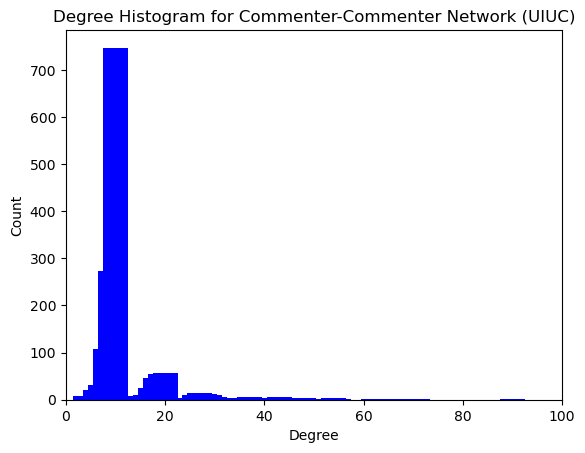

<Figure size 640x480 with 0 Axes>

In [124]:
# generate_degree_hist(cornell_graph, 'Cornell')
# generate_degree_hist(harvard_graph, 'Harvard')
# generate_degree_hist(berkeley_graph, 'Berkeley')
generate_degree_hist(uiuc_graph, 'UIUC')